In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# Load the dataset
loans = pd.read_csv("/kaggle/input/predicting-who-pays-back-loans/loan_data.csv")

In [10]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
# Convert certain columns to categorical data type
loans['credit.policy'] = loans['credit.policy'].astype('category')
loans['inq.last.6mths'] = loans['inq.last.6mths'].astype('category')
loans['delinq.2yrs'] = loans['delinq.2yrs'].astype('category')
loans['pub.rec'] = loans['pub.rec'].astype('category')
loans['not.fully.paid'] = loans['not.fully.paid'].astype('category')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

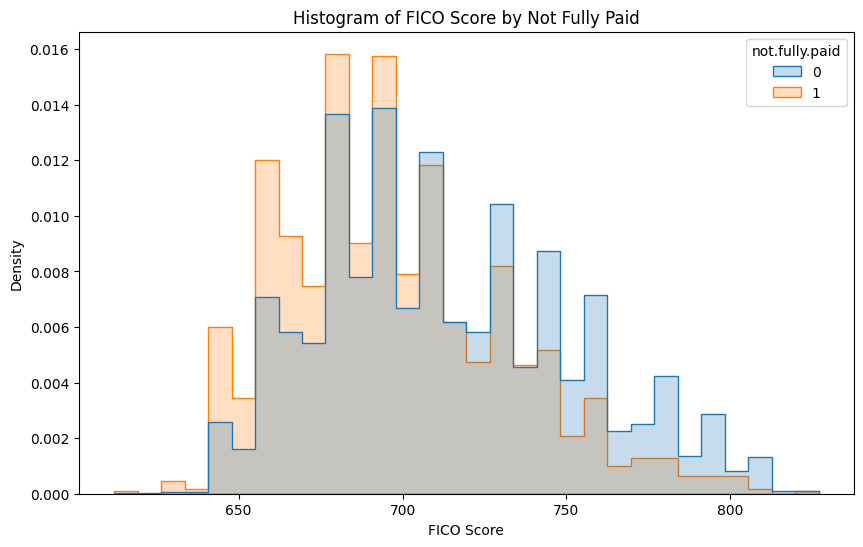

In [13]:
# Plot histogram for FICO score
plt.figure(figsize=(10, 6))
sns.histplot(data=loans, x='fico', hue='not.fully.paid', bins=30, element='step', stat='density', common_norm=False)
plt.title('Histogram of FICO Score by Not Fully Paid')
plt.xlabel('FICO Score')
plt.ylabel('Density')
plt.show()

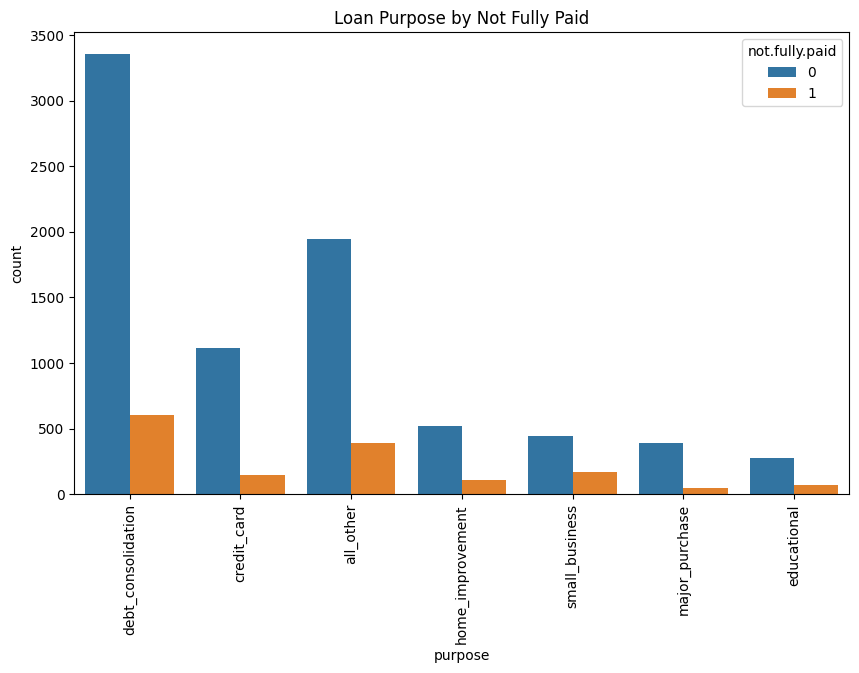

In [14]:
# Bar plot for purpose vs not fully paid
plt.figure(figsize=(10, 6))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', dodge=True)
plt.xticks(rotation=90)
plt.title('Loan Purpose by Not Fully Paid')
plt.show()

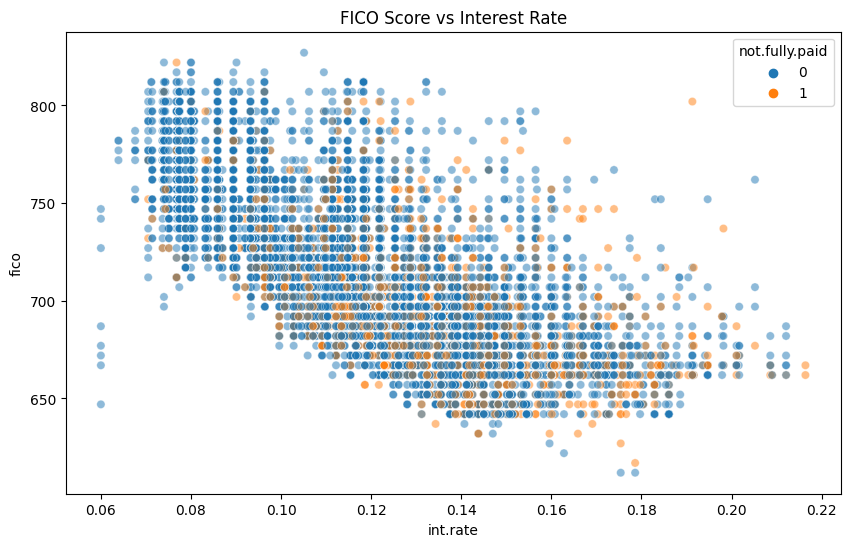

In [15]:
# Scatter plot for interest rate vs FICO score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loans, x='int.rate', y='fico', hue='not.fully.paid', alpha=0.5)
plt.title('FICO Score vs Interest Rate')
plt.show()

In [17]:
# Split the data into training and testing sets
X = loans.drop(columns='not.fully.paid')  # Features
y = loans['not.fully.paid']                # Target variable

# Create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# Train the Support Vector Machine model
svm_model = SVC(random_state=101)
svm_model.fit(X_train, y_train)
# Make predictions
predicted_values = svm_model.predict(X_test)

In [21]:
# Confusion Matrix
confusion = confusion_matrix(y_test, predicted_values)
print("Confusion Matrix:")
confusion

Confusion Matrix:


array([[2431,    0],
       [ 442,    1]])

In [22]:
# Classification Report
report = classification_report(y_test, predicted_values)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       1.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.87      0.85      0.78      2874



In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']  # radial basis function kernel
}

In [26]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)

Best Parameters from Grid Search:
{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}


In [27]:
# Make predictions with the best model
best_svm_model = grid_search.best_estimator_
predicted_values_tuned = best_svm_model.predict(X_test)

In [28]:
# Confusion Matrix and Classification Report for tuned model
confusion_tuned = confusion_matrix(y_test, predicted_values_tuned)
print("Confusion Matrix (Tuned Model):")
print(confusion_tuned)

report_tuned = classification_report(y_test, predicted_values_tuned)
print("Classification Report (Tuned Model):")
print(report_tuned)

Confusion Matrix (Tuned Model):
[[2431    0]
 [ 443    0]]
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
